 **Without Function** - Aaryan Karn


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

In [2]:
url="https://raw.githubusercontent.com/sayande01/Kaggle_Notebooks/refs/heads/main/gym_members_exercise_tracking.csv"
dataset=pd.read_csv(url)

In [3]:
dataset.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
dataset.shape

(973, 15)

In [5]:
dataset.isnull().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [6]:
y = dataset['Calories_Burned']
X = dataset.drop(['Calories_Burned', 'Workout_Type', 'Gender'], axis=1)

In [7]:
X.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,88.3,1.71,180,157,60,1.69,12.6,3.5,4,3,30.20
1,46,74.9,1.53,179,151,66,1.30,33.9,2.1,4,2,32.00
2,32,68.1,1.66,167,122,54,1.11,33.4,2.3,4,2,24.71
3,25,53.2,1.70,190,164,56,0.59,28.8,2.1,3,1,18.41
4,38,46.1,1.79,188,158,68,0.64,29.2,2.8,3,1,14.39


In [8]:
X.shape

(973, 12)

In [9]:
from sklearn.model_selection import train_test_split
scaler=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [11]:
class RegressionModel(nn.Module):
  def __init__(self):
    super(RegressionModel, self).__init__()
    self.layer1=nn.Linear(12,1)

  def forward(self,x):
    x=self.layer1(x)
    return x

In [12]:
model:RegressionModel=RegressionModel()

In [13]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [14]:
train_loss=[]
test_loss=[]
train_accuracy=[]
train_loss=[]

In [15]:
num_epochs = 5000
train_losses = []  # Initialize the list for storing training losses
test_losses = []  # Initialize the list for storing test losses

for ep in range(num_epochs):
    # Training mode
    model.train()

    # Forward pass
    predicted_y = model(X_train_tensor).squeeze()
    y_train = y_train_tensor.squeeze()
    losses = loss(predicted_y, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()  # Zero the gradients before the backward pass
    losses.backward()  # Backpropagation
    optimizer.step()  # Update the model parameters

    # Print training loss every 100 epochs
    if ep % 100 == 0:
        print(f"Epoch [{ep}/{num_epochs}], Training Loss: {losses.item()}")

    # Append the training loss to the list
    train_losses.append(losses.item())

    # Evaluate on test set
    model.eval()  # Set model to evaluation mode

    with torch.no_grad():  # No gradients needed for evaluation
        predicted_y_test = model(X_test_tensor).squeeze()
        y_test=y_test_tensor.squeeze()
        test_loss = loss(predicted_y_test, y_test_tensor)

    # Append the test loss to the list
    test_losses.append(test_loss.item())

    # Print test loss every 100 epochs
    if ep % 100 == 0:
        print(f"Epoch [{ep}/{num_epochs}], Test Loss: {test_loss.item()}")

Epoch [0/5000], Training Loss: 887594.0625
Epoch [0/5000], Test Loss: 901660.5625
Epoch [100/5000], Training Loss: 259671.421875
Epoch [100/5000], Test Loss: 252419.3125
Epoch [200/5000], Training Loss: 82331.609375
Epoch [200/5000], Test Loss: 79628.4921875
Epoch [300/5000], Training Loss: 28295.958984375
Epoch [300/5000], Test Loss: 27601.5546875
Epoch [400/5000], Training Loss: 11384.61328125
Epoch [400/5000], Test Loss: 11294.294921875
Epoch [500/5000], Training Loss: 5850.75537109375
Epoch [500/5000], Test Loss: 5912.7744140625
Epoch [600/5000], Training Loss: 3887.871826171875
Epoch [600/5000], Test Loss: 3974.2490234375
Epoch [700/5000], Training Loss: 3098.405029296875
Epoch [700/5000], Test Loss: 3177.52001953125
Epoch [800/5000], Training Loss: 2727.503173828125
Epoch [800/5000], Test Loss: 2794.23779296875
Epoch [900/5000], Training Loss: 2525.788818359375
Epoch [900/5000], Test Loss: 2581.34423828125
Epoch [1000/5000], Training Loss: 2403.606689453125
Epoch [1000/5000], Tes

In [16]:
predicted_y_test = predicted_y_test.numpy()  # Convert PyTorch tensor to numpy
y_test = y_test_tensor.numpy()  # Convert PyTorch tensor to numpy

# Create a dictionary with the two arrays
d = {'y_pred': predicted_y_test.flatten(), 'y_test': y_test.flatten()}

# Create a DataFrame
df = pd.DataFrame(d)

# Print the DataFrame
print(df)

          y_pred  y_test
0     738.050232   796.0
1     604.528809   643.0
2     815.534241   740.0
3     256.281006   331.0
4    1070.457031  1151.0
..           ...     ...
239   257.692902   330.0
240   989.201904   977.0
241  1382.204102  1345.0
242  1008.581543  1017.0
243   671.101379   707.0

[244 rows x 2 columns]


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, predicted_y_test)
mae = mean_absolute_error(y_test, predicted_y_test)
r2 = r2_score(y_test, predicted_y_test)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 2102.3525390625
Mean Absolute Error (MAE): 35.983184814453125
R-squared (R²): 0.9721285104751587


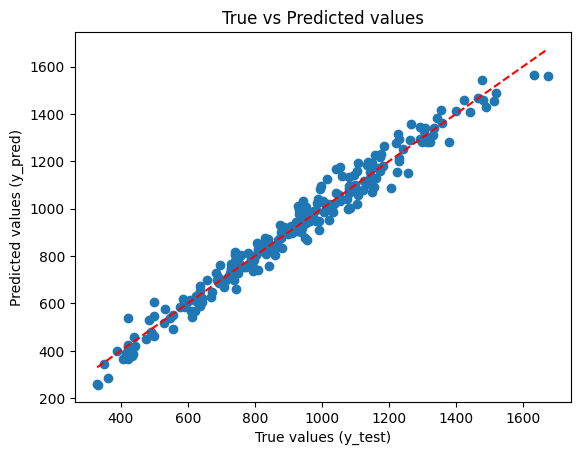

In [18]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predicted_y_test)
plt.xlabel("True values (y_test)")
plt.ylabel("Predicted values (y_pred)")
plt.title("True vs Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.show()

**With Function** - Aaryan Karn

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
dataset=pd.read_csv("https://raw.githubusercontent.com/sayande01/Kaggle_Notebooks/refs/heads/main/gym_members_exercise_tracking.csv")

In [21]:
dataset.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [23]:
y = dataset['Calories_Burned']
X = dataset.drop(['Calories_Burned', 'Workout_Type', 'Gender'], axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2509)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [26]:
regressor.score(X_test,y_test)

0.9729167050443709

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
d = {'y_pred': y_pred, 'y_test': y_test}

In [29]:
pd.DataFrame(d)

,y_pred,y_test
527,738.682438,796.0
750,600.052849,643.0
467,819.071236,740.0
569,251.905556,331.0
654,1067.867502,1151.0
...,...,...
619,265.945182,330.0
772,988.892678,977.0
557,1381.522370,1345.0
937,1010.043495,1017.0


from matplotlib import pyplot as plt
_df_0['y_pred'].plot(kind='hist', bins=20, title='y_pred')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['y_test'].plot(kind='hist', bins=20, title='y_test')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='y_pred', y='y_test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['y_pred'].plot(kind='line', figsize=(8, 4), title='y_pred')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['y_test'].plot(kind='line', figsize=(8, 4), title='y_test')
plt.gca().spines[['top', 'right']].set_visible(False)